In [1]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages (0.24.2)


In [1]:
import illustris_python as il
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

In [3]:
basePath = '../sims.TNG/TNG100-1/output'

In [4]:
mtype = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloMassType'])
gmetal = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloGasMetallicity'])
sfr = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloSFR'])

In [5]:
sfr.shape

(4449889,)

In [6]:
pdgmetal = pd.DataFrame(gmetal, columns=['Gas Metallicity'])
pdsfr = pd.DataFrame(sfr, columns=['Stellar Formation Rate'])

In [7]:
gmass = mtype[:,0]
dmmass = mtype[:,1]
stmass = mtype[:,4]
bhmass = mtype[:,5]

In [8]:
pdgmass = np.log10((pd.DataFrame(gmass, columns=['Gas Mass']))*(10**10))
pddmmass = np.log10((pd.DataFrame(dmmass, columns=['Dark Matter Mass']))*(10**10))
pdstmass = np.log10((pd.DataFrame(stmass, columns=['Stellar Mass']))*(10**10))
pdbhmass = np.log10((pd.DataFrame(bhmass, columns=['Black Hole Mass']))*(10**10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [9]:
pdgmass

,Gas Mass
0,13.560769
1,10.616129
2,9.833847
3,8.702190
4,10.616082
5,10.349732
6,8.778911
7,9.376182
8,8.580060
9,-inf


In [10]:
pdgmetal.replace(to_replace = 0, value = 10**-8, inplace=True)
pdsfr.replace(to_replace = 0, value = 10**-8, inplace=True)
pdgmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pddmmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pdstmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pdbhmass.replace(to_replace = -np.inf, value = 8, inplace=True) 

pdgmetal.fillna(0,inplace=True)
pdsfr.fillna(0,inplace=True)
pdgmass.fillna(0,inplace=True)
pddmmass.fillna(0,inplace=True)
pdstmass.fillna(0,inplace=True)
pdbhmass.fillna(0,inplace=True)

In [11]:
df = pd.DataFrame(pdgmetal)
df['Stellar Formation Rate'] = pdsfr
df['Gas Mass'] = pdgmass
df['Stellar Mass'] = pdstmass
df['Black Hole Mass'] = pdbhmass
df['Dark Matter Mass'] = pddmmass

In [12]:
df['Stellar Mass'] = df['Stellar Mass'][(df['Stellar Mass'] > 9)]
df['Gas Mass'] = df['Gas Mass'][(df['Gas Mass'] > 9)]
df['Black Hole Mass'] = df['Black Hole Mass'][(df['Gas Mass'] > 9)]
df['Dark Matter Mass'] = df['Dark Matter Mass'][(df['Dark Matter Mass'] > 9)]

In [13]:
df

,Gas Metallicity,Stellar Formation Rate,Gas Mass,Stellar Mass,Black Hole Mass,Dark Matter Mass
0,3.920325e-03,1.191226e+01,13.560769,12.189699,9.722685,14.337950
1,1.873566e-02,3.078836e+01,10.616129,11.680131,9.218713,12.360018
2,1.576501e-02,1.733503e+00,9.833847,11.401998,8.900288,12.290782
3,1.192400e-02,1.000000e-08,NaN,11.214507,NaN,12.363270
4,1.047468e-02,1.204401e+00,10.616082,11.025039,8.616725,12.339452
5,1.022192e-02,1.597838e-01,10.349732,11.027363,8.619128,12.318264
6,1.000000e-08,2.823719e-01,NaN,11.155582,NaN,11.939962
7,2.241294e-02,1.813387e-01,9.376182,11.137780,8.574426,11.917122
8,2.482055e-02,1.000000e-08,NaN,10.909927,NaN,12.073301
9,1.000000e-08,1.000000e-08,NaN,11.054082,NaN,11.927304


In [14]:
ddf = df.dropna()

In [15]:
ddf

,Gas Metallicity,Stellar Formation Rate,Gas Mass,Stellar Mass,Black Hole Mass,Dark Matter Mass
0,3.920325e-03,1.191226e+01,13.560769,12.189699,9.722685,14.337950
1,1.873566e-02,3.078836e+01,10.616129,11.680131,9.218713,12.360018
2,1.576501e-02,1.733503e+00,9.833847,11.401998,8.900288,12.290782
4,1.047468e-02,1.204401e+00,10.616082,11.025039,8.616725,12.339452
5,1.022192e-02,1.597838e-01,10.349732,11.027363,8.619128,12.318264
7,2.241294e-02,1.813387e-01,9.376182,11.137780,8.574426,11.917122
10,1.362134e-02,1.293150e+00,9.622435,11.158328,9.008406,11.464358
11,1.699104e-02,4.056620e-01,10.323713,10.906580,8.262805,11.863054
17,1.000000e-08,5.703614e-01,9.493634,10.582535,8.366025,11.843437
19,3.257207e-02,1.019201e+00,10.543909,10.528874,7.960117,11.685776


In [16]:
Features = ddf[['Gas Metallicity', 'Stellar Formation Rate', 'Gas Mass', 'Stellar Mass', 'Black Hole Mass']]
Target = ddf['Dark Matter Mass']
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.1)

In [17]:
X_train.shape

(12647, 5)

In [18]:
Target.shape

(14053,)

prediction :  [10.89498442 11.17829262 12.38293478 ... 10.79569804 11.2061848
 11.17600005]
R2 Score :  0.8860086269579551
The mean square value :  0.028256008857502183
The Score :  {'fit_time': array([0.07897449, 0.0757966 , 0.07692075, 0.07765746, 0.07777309,
       0.07491064, 0.07879949]), 'score_time': array([0.00182486, 0.00174379, 0.00181794, 0.00169134, 0.00171447,
       0.00232124, 0.00226569]), 'test_score': array([0.89356149, 0.88508864, 0.89529994, 0.87368288, 0.87166328,
       0.8867157 , 0.88184016]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.8839788708927043
Train Score :  1.0
Cross Vaidate prediction :  [14.0279566  11.56971764 12.34445221 ... 10.39300501 10.7801341
 10.49519491]


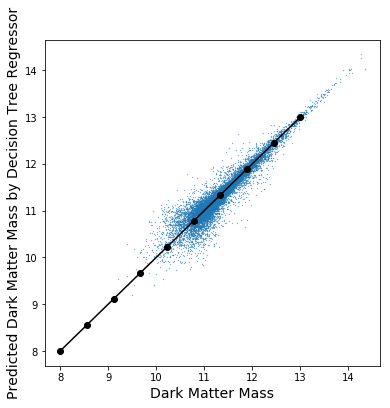

In [19]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

m = np.linspace(8, 13, 10)
n = m


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(Target,Cvpred, '.', markersize=0.5)
ax.plot(m, n, color='black', linestyle='-', marker='o')
ax.set_xlabel('Dark Matter Mass', fontsize=14)
ax.set_ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)
plt.show()

prediction :  [10.90001646 11.17829262 12.41064694 ... 10.79569804 11.2061848
 11.06611664]
R2 Score :  0.888857177332924
The mean square value :  0.027549914505989506
The Score :  {'fit_time': array([0.07694507, 0.07659078, 0.07776809, 0.07780981, 0.07698584,
       0.07731032, 0.07696843]), 'score_time': array([0.00186896, 0.00194335, 0.00176525, 0.00171804, 0.00175333,
       0.00169969, 0.00182152]), 'test_score': array([0.89341333, 0.8845942 , 0.89491626, 0.87375751, 0.87672763,
       0.88881686, 0.88094151]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.8847381843463097
Train Score :  1.0
Cross Vaidate prediction :  [14.26383073 11.56971764 12.34993473 ... 10.39300501 10.82711384
 10.49519491]
Pearson Correlation Coefficient: 0.9424282815672684
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Decision Tree Regressor')

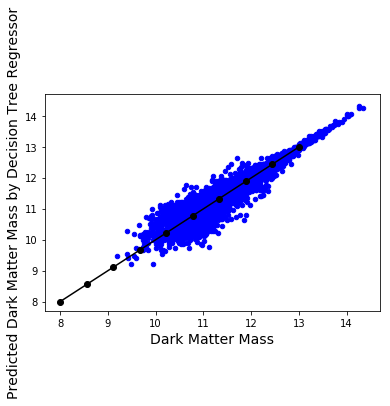

In [20]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

C_coeff, P_value = stats.pearsonr(Cvpred.reshape((14053,)), Target)
print("Pearson Correlation Coefficient:", C_coeff)
print("P-value:", P_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,Cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)

prediction :  [11.12610341 11.16020762 12.3139897  ... 10.5337549  11.25631586
 11.00624956]
R2 Score :  0.9220475210933217
The mean square value :  0.01932274237664399
The Score :  {'fit_time': array([0.02291036, 0.02154565, 0.02237606, 0.02145028, 0.02220297,
       0.02215409, 0.02374959]), 'score_time': array([0.01222539, 0.0120852 , 0.01296711, 0.01211143, 0.01232719,
       0.01235032, 0.01260138]), 'test_score': array([0.9257444 , 0.91267848, 0.92540565, 0.9172351 , 0.91965625,
       0.91537415, 0.92253579]), 'train_score': array([0.96005514, 0.96005002, 0.95945689, 0.9606405 , 0.96085494,
       0.96004492, 0.95979324])}
Test Score :  0.9198042609449824
Train Score :  0.9601279523034599
Cross Vaidate prediction :  [13.63830987 13.04258659 11.97349741 ... 10.41670577 10.63779835
 10.66799699]
Pearson Correlation Coefficient: 0.9591194661561901
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by KNN Regressor')

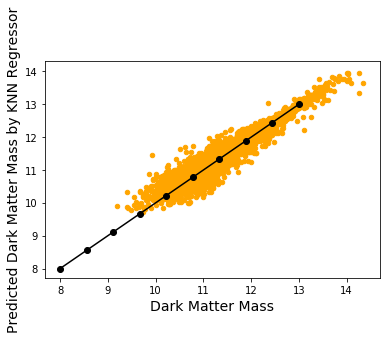

In [21]:
KnnRegressor = KNeighborsRegressor(n_neighbors=3)
KnnRegressor.fit(X_train, Y_train)
KY_pred = KnnRegressor.predict(X_test)
print ("prediction : ", KY_pred)

KR = r2_score(Y_test, KY_pred)
print ("R2 Score : ", KR)

KMse = mean_squared_error(Y_test, KY_pred)
print ("The mean square value : ", KMse)

KScores = cross_validate(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
KS = np.mean(KScores['test_score'])
print ("The Score : ", KScores)
print ("Test Score : ", KS)
print ("Train Score : ", np.mean(KScores['train_score']))

KCvpred = cross_val_predict(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", KCvpred)

KC_coeff, KP_value = stats.pearsonr(KCvpred.reshape((14053,)), Target)
print("Pearson Correlation Coefficient:", KC_coeff)
print("P-value:", KP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,KCvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by KNN Regressor',fontsize=14)

prediction :  [11.11973469 11.13088549 12.06802143 ... 10.61259585 11.19263427
 10.98703359]
R2 Score :  0.8964998045249035
The mean square value :  0.02565547165590201
The Score :  {'fit_time': array([0.00508165, 0.00512671, 0.00499368, 0.00514817, 0.00510287,
       0.00503254, 0.00507164]), 'score_time': array([0.00221896, 0.00230145, 0.00235248, 0.00225472, 0.00229859,
       0.00231218, 0.00246596]), 'test_score': array([0.9037118 , 0.89814134, 0.90247549, 0.88670182, 0.88749912,
       0.89087532, 0.90578201]), 'train_score': array([0.89566836, 0.89658091, 0.89568109, 0.8984003 , 0.89834047,
       0.89780115, 0.89536875])}
Test Score :  0.8964552708519108
Train Score :  0.8968344327279737
Cross Vaidate prediction :  [14.14499997 11.54355648 11.8749914  ... 10.55473873 10.44440433
 10.46608793]
Pearson Correlation Coefficient: 0.9468383825313698
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Linear Regressor')

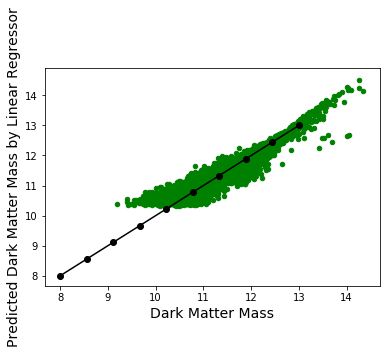

In [22]:
LRegressor = LinearRegression()
LRegressor.fit(X_train, Y_train)
LY_pred = LRegressor.predict(X_test)
print ("prediction : ", LY_pred)

LR = r2_score(Y_test, LY_pred)
print ("R2 Score : ", LR)

LMse = mean_squared_error(Y_test, LY_pred)
print ("The mean square value : ", LMse)

LScores = cross_validate(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
LS = np.mean(LScores['test_score'])
print ("The Score : ", LScores)
print ("Test Score : ", LS)
print ("Train Score : ", np.mean(LScores['train_score']))

LCvpred = cross_val_predict(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", LCvpred)

LC_coeff, LP_value = stats.pearsonr(LCvpred.reshape((14053,)), Target)
print("Pearson Correlation Coefficient:", LC_coeff)
print("P-value:", LP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,LCvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Linear Regressor',fontsize=14)

prediction :  [11.06555391 11.17172054 12.24691939 ... 10.62369725 11.19992497
 11.10088479]
R2 Score :  0.9399279410212416
The mean square value :  0.014890570972999175
The Score :  {'fit_time': array([4.59112191, 4.49265409, 4.57837391, 4.51825809, 4.50828218,
       4.53629518, 4.55838895]), 'score_time': array([0.0592978 , 0.05987072, 0.08109522, 0.0580225 , 0.06114125,
       0.05984974, 0.05990982]), 'test_score': array([0.94177487, 0.94035482, 0.94834863, 0.93764728, 0.9337565 ,
       0.93780693, 0.9399901 ]), 'train_score': array([0.99163234, 0.99170995, 0.99139975, 0.99175571, 0.9918886 ,
       0.99161234, 0.99166495])}
Test Score :  0.9399541615817569
Train Score :  0.9916662353508886
Cross Vaidate prediction :  [14.09787734 11.95678595 11.69115386 ... 10.63055712 10.62406579
 10.66941945]
Pearson Correlation Coefficient: 0.9693697858956851
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Random Forest Regressor')

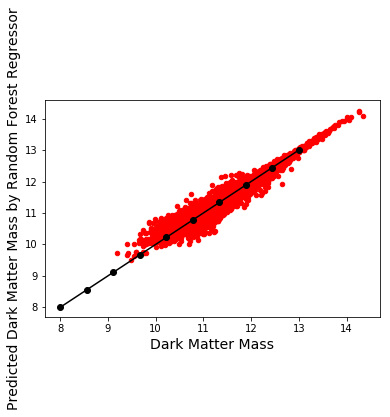

In [23]:
FORegressor = RandomForestRegressor()
FORegressor.fit(X_train, Y_train)
FOY_pred = FORegressor.predict(X_test)
print ("prediction : ", FOY_pred)

FOR = r2_score(Y_test, FOY_pred)
print ("R2 Score : ", FOR)

FOMse = mean_squared_error(Y_test, FOY_pred)
print ("The mean square value : ", FOMse)

FOScores = cross_validate(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
FOS = np.mean(FOScores['test_score'])
print ("The Score : ", FOScores)
print ("Test Score : ", FOS)
print ("Train Score : ", np.mean(FOScores['train_score']))

FOCvpred = cross_val_predict(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", FOCvpred)

FC_coeff, FP_value = stats.pearsonr(FOCvpred.reshape((14053,)), Target)
print("Pearson Correlation Coefficient:", FC_coeff)
print("P-value:", FP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,FOCvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Random Forest Regressor',fontsize=14)

prediction :  [11.05251206 11.16425451 12.25325688 ... 10.66614768 11.18566504
 11.07035227]
R2 Score :  0.9388380443455796
The mean square value :  0.0151607329098144
The Score :  {'fit_time': array([1.91004586, 1.89250064, 1.89453602, 1.900002  , 1.90796924,
       1.88784361, 1.82950664]), 'score_time': array([0.07356954, 0.07351446, 0.07780147, 0.08313632, 0.12951517,
       0.11703181, 0.08140206]), 'test_score': array([0.94337347, 0.94045192, 0.949324  , 0.93743571, 0.93512225,
       0.93707262, 0.93896362]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.9402490840731197
Train Score :  1.0
Cross Vaidate prediction :  [14.19815574 12.31172894 11.82863231 ... 10.63243169 10.58077707
 10.68438208]
Pearson Correlation Coefficient: 0.9697299733507284
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Extreme Random Forest Regressor')

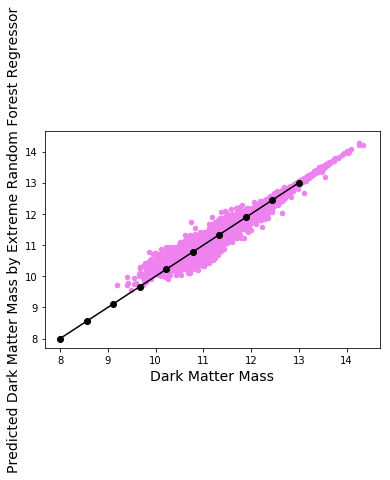

In [24]:
ETRegressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
ETRegressor.fit(X_train, Y_train)
ETY_pred = ETRegressor.predict(X_test)
print ("prediction : ", ETY_pred)

ETR = r2_score(Y_test, ETY_pred)
print ("R2 Score : ", ETR)

ETMse = mean_squared_error(Y_test, ETY_pred)
print ("The mean square value : ", ETMse)

ETScores = cross_validate(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
ETS = np.mean(ETScores['test_score'])
print ("The Score : ", ETScores)
print ("Test Score : ", ETS)
print ("Train Score : ", np.mean(ETScores['train_score']))

ETCvpred = cross_val_predict(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", ETCvpred)

ETC_coeff, ETP_value = stats.pearsonr(ETCvpred.reshape((14053,)), Target)
print("Pearson Correlation Coefficient:", ETC_coeff)
print("P-value:", ETP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,ETCvpred, s = 20, c = 'violet')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Extreme Random Forest Regressor',fontsize=14)

 Model Comparisons for Case 2 


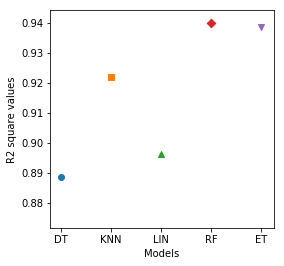

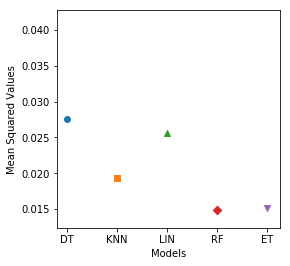

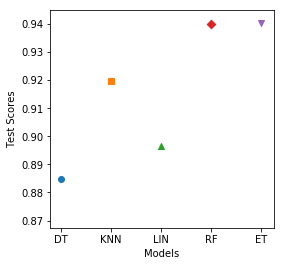

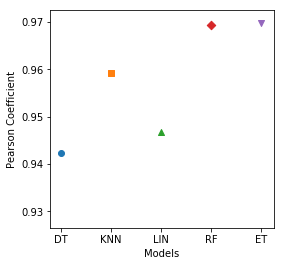

In [25]:
#COMPARISON GRAPH (CASE 2)

print ("\033[1m Model Comparisons for Case 2 \033[0m")

#R square
plt.figure(figsize=(4, 4))
g = [R, KR, LR, FOR, ETR]
h = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(g)):
    plt.scatter(h[i], g[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#Mean Squared Error

plt.figure(figsize=(4, 4))
gg = [Mse, KMse, LMse, FOMse, ETMse]
hh = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(gg)):
    plt.scatter(hh[i], gg[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
G = [S, KS, LS, FOS, ETS]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
G = [C_coeff, KC_coeff, LC_coeff, FC_coeff, ETC_coeff]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()